# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab

1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.5.3" # any version ≥ 0.7.0
JULIA_PACKAGES="Knet AutoGrad IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia
  julia -e 'using Knet;'

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.5.3 on the current Colab Runtime...
2021-01-30 09:42:48 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.5/julia-1.5.3-linux-x86_64.tar.gz [105260711/105260711] -> "/tmp/julia.tar.gz" [1]
Installing Julia package Knet...
 Installing known registries into `~/.julia`
######################################################################## 100.0%
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed Compat ─────────────────────── v3.25.0
  Installed Requires ───────────────────── v1.1.2
  Installed CodecZlib ──────────────────── v0.7.0
  Installed BFloat16s ──────────────────── v0.1.0
  Installed GPUArrays ──────────────────── v6.2.0
  Installed FileIO ─────────────────────── v1.4.5
  Installed DataStructures ─────────────── v0.18.9
  Installed Reexport ───────────────────── v1.0.0
  Installed OpenSpecFun_jll ────────────── v0.5.3+4
  Installed ExprTools ──────────────────── v0.1.3
  Installed Transcodin

## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [1]:
versioninfo()

Julia Version 1.5.3
Commit 788b2c77c1 (2020-11-09 13:37 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 4


# Your Own Work
Write your code under this section.


# COMP541 Visualization Lab
* In this Lab you will implement some methods and experiment with several visualization techniques.
* Please read all the instructions and comments carefully.
* **IMPORTANT: NEXT STEP MAY TAKE A LITTLE BIT LONGER. PLEASE WAIT UNTILL ALL YOUR PACKAGES are installed.**

In [2]:
# You may comment out this cell after installing all the necessary packages
using Pkg; installed = Pkg.installed()
for p in ("Knet", "IJulia", "Images", "ImageMagick", "Plots", "Plotly", "PlotlyJS", "ORCA", "MAT")
    haskey(installed,p) || Pkg.add(p)
end
pkg"add https://github.com/ilkerkesen/Sloth.jl"
# PLEASE WAIT TO FINISH PACKAGE INSTALLATION

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.5/Pkg/src/Pkg.jl:554
   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
  Installed SortingAlgorithms ───────── v0.3.1
  Installed FFTViews ────────────────── v0.3.1
  Installed ImageShow ───────────────── v0.2.3
  Installed Images ──────────────────── v0.23.3
  Installed IndirectArrays ──────────── v0.5.1
  Installed Graphics ────────────────── v1.0.2
  Installed OffsetArrays ────────────── v1.5.2
  Installed CustomUnitRanges ────────── v1.0.1
  Installed MKL_jll ─────────────────── v2020.2.254+0
  Installed EllipsisNotation ────────── v1.0.0
  Installed ImageMorphology ─────────── v0.2.9
  Installed AxisArrays ──────────────── v0.4.3
  Installed StaticArrays ────────────── v1.0.1
  Installed StatsBase ───────────────── v0.33.2
  Installed Ratios ──────────────────── v0.4.0
  Installed ImageFiltering ──────────── v0.6.18
  Installed Im

    Cloning git-repo `https://github.com/ilkerkesen/Sloth.jl`


   Updating git-repo `https://github.com/ilkerkesen/Sloth.jl`


  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [599f0d3e] + Sloth v0.1.0 `https://github.com/ilkerkesen/Sloth.jl#master`
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [599f0d3e] + Sloth v0.1.0 `https://github.com/ilkerkesen/Sloth.jl#master`


In [3]:
# A bit of setup as usual
using Knet, Sloth, IJulia, Images, Plots, Statistics, Test
F = eltype(Knet.atype())

const IMAGES = [
    ("https://github.com/BVLC/caffe/raw/master/examples/images/cat.jpg", "cat.jpg", 284),
    ("http://farm1.static.flickr.com/64/168461914_afe4852372.jpg", "elephant.jpg",387),
    ("http://www.treetopics.com/quercus_macrocarpa/buroak_2919.jpg","buroak_2919.jpg",704),
    ("https://i.ibb.co/J2jdYjH/15-1.jpg","dog.jpg",187)
];

┌ Info: Precompiling Knet [1902f260-5fb4-5aff-8c31-6271790ab950]
└ @ Base loading.jl:1278
┌ Info: Precompiling Sloth [599f0d3e-fa5b-11e8-3d5f-e1ebc21cfa8f]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [5]:
# Construct our model based on VGG16, returns class scores
model = Sloth.vgg16(pretrained=true)
average_image, classes = Sloth._get_imagenet_metadata();

## Implement Image Processing Procedures

In [6]:
"""
    download_image(url, path)

Download image from `url`, then save it to `path`.
"""
function download_image(url, path)
    if !isfile(path)
        @info "Downloading $url to $path"
        download(url, path)
    end
end;

"""
    resize_crop_image(image, len::Int=224)

Resize, and then crop `image`. Output image has dimensions `len`x`len`.
"""
function resize_crop_image(image, len=224)
    a0 = image
    new_size = ntuple(i->div(size(a0,i)*len,minimum(size(a0))),2)
    a1 = Images.imresize(a0, new_size)
    i1 = div(size(a1,1)-len,2)
    j1 = div(size(a1,2)-len,2)
    b1 = a1[i1+1:i1+len,j1+1:j1+len]
    RGB{Float64}.(b1)
end


"""
    vgg_image(cropped, average_image)

Make input image `cropped` valid for `vgg16`.
"""
function vgg_image(cropped, average_image=F(0.0))
    b1 = convert(Array{FixedPointNumbers.Normed{UInt8,8},3}, channelview(cropped))
    c1 = permutedims(b1, (3,2,1))
    d1 = convert(Array{Float32}, c1)
    e1 = reshape(d1[:,:,1:3], (224,224,3,1))
    f1 = (255 * e1 .- average_image)
    g1 = permutedims(f1, [2,1,3,4])
end

"""
    preprocess(image, average_image)

Make raw image `image` valid for `vgg16`.
"""
function preprocess(image, average_image=F(0.0))
    vgg_image(resize_crop_image(image), average_image)
end

preprocess

## Process and then Visuazlize Example Images

┌ Info: Downloading https://github.com/BVLC/caffe/raw/master/examples/images/cat.jpg to cat.jpg
└ @ Main In[6]:8
┌ Info: Downloading http://farm1.static.flickr.com/64/168461914_afe4852372.jpg to elephant.jpg
└ @ Main In[6]:8
┌ Info: Downloading http://www.treetopics.com/quercus_macrocarpa/buroak_2919.jpg to buroak_2919.jpg
└ @ Main In[6]:8
┌ Info: Downloading https://i.ibb.co/J2jdYjH/15-1.jpg to dog.jpg
└ @ Main In[6]:8
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


,,,

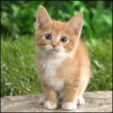
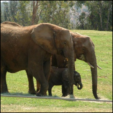
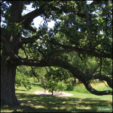
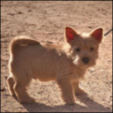

In [7]:
# Download and then process images
for (url, path, class) in IMAGES
    download_image(url, path)
end
paths, labels = map(x->x[2], IMAGES), map(x->x[3], IMAGES)
crops = [resize_crop_image(load(path)) for path in paths]
inputs = [vgg_image(crop, average_image) for crop in crops]

crops

## Occlusion Experiments
You are going to occlude input image from different regions and observe the probability of predicted class of occluded image.

For Occlusion Experiments, you need to:
* Complete `occlude_image` method.
* Pass the generated occluded images through the model and update the results matrix with the probability of the original predicted class you get with the occluded image.

### Finishing up the occlude_image method
It is used to obtain occluded versions of the orjinal image. You are going to modify the input image by moving occlusion box through the image. You will return `occluded_images` array of arrays which stores modified images, each of which has is a `KnetArray{Float32,4}` array. The color of the occlusion box will be the mean color of original image.
Parameters of `occlude_image` method:
* `image` : output of resize_crop_image method. It's type is Array{RGB}.
* `occlusion_size` : `(w,h)` tuple defining the size of occlusion box.
* **Hint**: Double check that you are occluding only a single region at a time in the input image
* **Hint-2**: You may want to use **preprocess** method to convert your occluded image to desired type before pushing it to **occluded_images**.

In [95]:
"""
    occlude_image(image, occlusion_size)

Generate occluded images with size `occlusion_size` for different regions of
input image `image` by moving occlusion box `occbox`.
"""
function occlude_image(image, occlusion_size=(56,56))
    w,h = size(image)
    num_rows, num_cols = div(w, occlusion_size[1]), div(h, occlusion_size[2])
    occluded_images = Array{Knet.atype()}(undef, num_rows, num_cols)
    # we use these values in our occlusion box
    meanvals = mean(image)
    occbox  = zeros(RGB{Float64},(occlusion_size)) .+ meanvals
    for (i, c1) in enumerate(1:occlusion_size[1]:w)
        for (j, c2) in enumerate(1:occlusion_size[2]:h)
            # Your code here
            occ_image = copy(image)
            occ_image[c1:c1+occlusion_size[1]-1, c2:c2+occlusion_size[2]-1] = occbox 
            prep_occ_image = preprocess(occ_image)
            occluded_images[i,j] = prep_occ_image
        end
    end
    occluded_images
end

@test sum(abs2.(occlude_image(crops[1])[1,1][1:56,1:56,1])) ≈ 5.71536f7

Test Passed

### Processing occluded_images
Inside the next cell, you will classify each occluded image stored in
`occluded_images` array. The code for classifying the original image and
iterating over the occluded images are given. After each classification, you
will store the probability of target class in the results matrix at the
correct position.

In [128]:
"""
    process_occluded_images(occlusion_image_index::Int=1)

Predict occluded images as labels, and calculate probabilities for labels with
maximum score.
"""
function process_occluded_images(occlusion_image_index=1)
    println("Most confident class and probability of the original image:")
    scores = Array(softmax(model(Knet.atype(inputs[occlusion_image_index]))))
    lindex = LinearIndices(scores)
    prob, cindex = findmax(scores)
    bestlabel = lindex[cindex]
    println("Class $bestlabel with probability $prob\n")
    flush(stdout)

    occluded_images = occlude_image(crops[occlusion_image_index], (56,56))
    result = zeros(size(occluded_images))
    predicted = Array{Int,2}(undef, size(result))

    for i in 1:size(occluded_images, 1)
        for j in 1:size(occluded_images, 2)
            occluded_image = occluded_images[i, j]
            # Your code here
            scores = Array(softmax(model(Knet.atype(occluded_image))))
            lindex = LinearIndices(scores)
            prob, cindex2 = findmax(scores)
            predicted[i,j] = lindex[cindex2]
            result[i,j] =  scores[labels[occlusion_image_index]] 
        end
    end

    return result, predicted
end

result, predicted = process_occluded_images()
println("Probability matrix of the class under different occlusions:")
flush(stdout)
display(result)

println("Predicted classes:")
flush(stdout)
display(predicted)
flush(stdout)

@test predicted[1] == 286
@test predicted[end] == 282

Most confident class and probability of the original image:
Class 282 with probability 0.27326965

Probability matrix of the class under different occlusions:


4×4 Array{Float64,2}:
 0.00370688  0.00780497  0.00450241  0.00223671
 0.00449052  0.00133186  0.0209372   0.00449538
 0.00208693  0.0012221   0.00601165  0.00616312
 0.00329694  0.00196443  0.00442838  0.00492144

Predicted classes:


4×4 Array{Int64,2}:
 286  286  286  286
 286  286  286  286
 286  286  286  286
 282  283  286  282

Test Passed

## Saliency Maps

We will compute saliency maps described in section 3.1 of [1].

A saliency map is a guide to see which parts of the image affects the
prediction of a class. To do that you need to implement `compute_saliency`
which will return the unnormalized class score of the given image.
After implementing forward calculation AutoGrad will calculate gradients with
respect to the image pixels and the provided function will display the
saliency map.

[1] Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside
Convolutional Networks: Visualising Image Classification Models and Saliency
Maps", ICLR Workshop 2014.

Saliency Visualisation - for each pixel maximum of absolute gradient in each channel

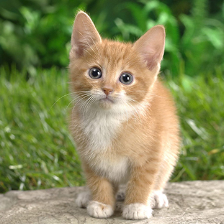

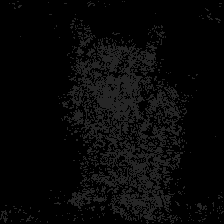

Test Passed

In [144]:
mnistview(x,i)=colorview(Gray,permutedims(x[:,:,1,i],(2,1)))
function visualize_saliency(gimg1)
    g1 = abs.(gimg1);
    g2 = maximum(Array(g1), dims=3)
    g2[g2 .> 1.0f-4] .+= 0.15 ## Enhances visibility
    display(mnistview(g2,1)')
end

"""
    compute_saliency(image, gold_label)

Compute saliency map for the given image `image` and label `gold_label` pair.
"""
function compute_saliency(image, gold_label)
    # Your code here
    scores = model(image)
    scores[gold_label]
end

saliency_image_index = 1
img_param = Param(Knet.atype(inputs[saliency_image_index]))
J = @diff compute_saliency(img_param, labels[saliency_image_index])
display(crops[saliency_image_index])
saliency_map = grad(J, img_param)
visualize_saliency(saliency_map)
@test sum(abs2.(saliency_map[33:64,33:64,1,:])) ≈ 4.3705796f-7

## Weight Visualization
We will visualize the weights of VGG16 model's first layer.
To do that, the only thing you need to to is complete `visualize_weights` method.
Since you will be using an unfamiliar implementation, the weights for the
first layer of the model is already extracted from the model.

**Hint**: You need to shift all the weight values between 0 and 1.<br>
**Hint-2**: You may want to look at `RGB` type and `colorview` method defined in `Images` package.<br>
**Hint-3**: To resize the image, you may want to take a look at `imresize` method defined in `Images` package.

In [150]:
"""
    visualize_weights(weights, scale=(16, 16))

Perform weight visualization for the convolutional layer weights, `weights`.
"""
function visualize_weights(weights, scale=(16, 16))
    # 1) Convert your weight to Array{Float32} type
    # 2) Clamp the weight array elements: All of them must be greater than or
    #    equal to zero.
    # 3) If you have N^2 filters in that layer, you will display them in a NxN
    #    grid. You will store each filter in a result array.
    # 4) You will resize each filter by using scale parameter. You may want to
    #    use imresize method.
    result = Any[]

    sqrtsize = Int(floor(sqrt(size(weights,4))))
    for i=1:sqrtsize
        result_col = Any[]
        for j=1:sqrtsize
            # Your code here            
                temp_weights = reshape(weights, size(weights,1),size(weights,2), size(weights,3), sqrtsize,sqrtsize)                
                temp_weights = temp_weights[:,:,:,j,i] 
                temp_weights = convert(Array{Float32},temp_weights)
                normalized = clamp.(temp_weights,0,1)            
                normalized = permutedims(normalized, (3,1,2))             
                rgb = colorview(RGB,normalized)            
                scaled = imresize(rgb, size(rgb,1).*scale)            
                push!(result_col, scaled)
        end
        push!(result, hcat(result_col...))
    end
    vcat(result...)
end

visualize_weights

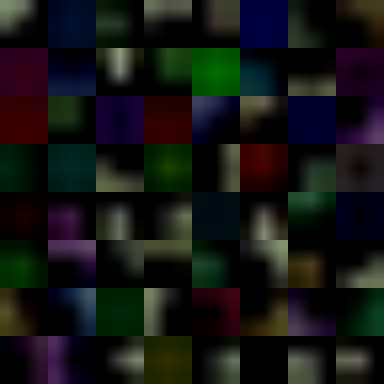

In [151]:
weights = model.features[1].weight.value
results = visualize_weights(weights)
as_array = F.(channelview(results))
@test sum(abs2.(as_array[1,41:80,41:80])) ≈ 8.362223f0
display(results)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*